### Generics

In [97]:
import string
import numpy as np

In [98]:
phrase = "To be, or not to be, that is the question"


In [99]:
phrase = "Heuristicas e Metaheuristicas"

In [100]:
phrase_list = [i for i in phrase]

In [101]:
def generate_random_solution(size , bin_str_size = 7):
    phrase = ''
    for letter in range(size):
        binary_letter_string = "".join(str(np.random.randint(0,2)) for i in range(bin_str_size))
        phrase = phrase + binary_letter_string
    return phrase

In [102]:
individual = generate_random_solution(len(phrase))
individual

'01110100110000011000011110101110000010101010111101101101110100001110101110010101100110111000101001000101100111000001100010011110010011101000100011010111110011101001101110000011101100101111100001100111000'

In [103]:
int("1111111", 2)

127

In [104]:
all_letters = string.printable[0:95]
#all_letters = string.printable[10:36]
print(all_letters)
print(len(all_letters))

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
95


In [105]:
#The scaler does not limit the max value,
#Instead it map the possible values in 
#The binary string 1111111 from [0, 127] to [0, 94]
#If we use a binary string 11111111 for ex [0, 255]
#The result would be 189 and we must clamp it if needed
#scale(int('11111111', 2))
# -> 189
def scale(value, new_min = 0, new_max = 94, old_max = 127):
#def scale(value, new_min = 0, new_max = 25, old_max = 31):
    return np.round(((value - 0) / (old_max - 0)) * (new_max - new_min) + new_min)

In [106]:
def inverse_scale(scaled_value, new_min=0, new_max=94, old_max=127, old_min=0):
#def inverse_scale(scaled_value, new_min=0, new_max=25, old_max=31, old_min=0):
    return np.round(((scaled_value - new_min) / (new_max - new_min)) * (old_max - old_min) + old_min)

In [107]:
def decode_binary_to_phrase(individual, bin_str_size = 7):
    phrase = ""
    for pos in range(0, len(individual), bin_str_size):
        binary_letter = str(individual[pos: pos+bin_str_size])
        #if int(binary_letter, 2) > 94:
        #    int_value = 94
        #else:
        #    int_value = int(binary_letter, 2)
        
        int_value = int(scale(int(binary_letter, 2)))
        
        letter = all_letters[int_value]
        phrase = phrase + letter 
    return phrase

In [108]:
individual_phrase = decode_binary_to_phrase(individual)
individual_phrase

"HAA{@v)>:H[%'u8l9tS:Q)lkM=)4F"

In [109]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    if score == 0:
        score = 0.0001
    else:
        score = (score / len(phrase))
        
    return 1 - score

In [110]:
score = individual_score(phrase, individual_phrase)
score

0.9655172413793104

In [111]:
text_list = []
for i in range(100):
    individual = generate_random_solution(len(phrase))
    print(individual)
    individual_phrase = decode_binary_to_phrase(individual)
    print(individual_phrase)
    score = individual_score(phrase, individual_phrase)
    print(score)
    text_list.append(individual_phrase)
    print("_"*100 + '\n')

11000111010110010001110111011001111001000111111000110010110010010110010010110011010010111001001101101101001111010001000111110101110010111001000000001100110000110010000100010101011110001000011111110000100
,#q(Wd}B-%gC'V&J6~GG0C4o7)c 3
0.9655172413793104
____________________________________________________________________________________________________

11000000000010010101011011101111111011011011101101100001111001011100001100010111111100001000011101110110001001000110000110000111100101000101100110001110100001100010111111001110000010101100111001001110111
*1v> E^+[@, 3l=rA+[PUH9z/1%-_
0.9655172413793104
____________________________________________________________________________________________________

00011100110010110000111010010001110110100101001101000011100001011010000000001010110000000001111000100000100011010010000111011101011101101001010100000010100101110001100011000000110101011001000000100101000
aB+;a;sON:1x0`Mac_y;u7yi*DB1u
0.9310344827586207
_____________________________________

In [112]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [113]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True);

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text);
        image_file = os.path.join(image_folder, f"image_{i}.png");
        image.save(image_file);
        image_files.append(image_file);



    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=1);  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file);

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path));

C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

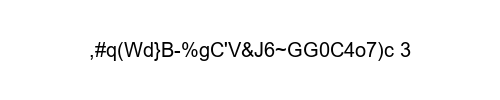

In [114]:
generate_GIF(text_list);

### Simulated Annealing

In [115]:
#Select a initial Solution
initial_solution = generate_random_solution(len(phrase))

In [116]:
len(initial_solution)

203

In [117]:
def perturbate_solution(s, n):
    for i in range(n):
        pos = np.random.choice(len(s))
        
        binary_list = list(s)
        
        if binary_list[pos] == '0':
            binary_list[pos] = '1'
        else:
            binary_list[pos] = '0'
        
        s = ''.join(binary_list)
    
    return s

In [118]:
initial_solution == perturbate_solution(initial_solution, 1)

False

In [119]:
#Select the temperature change counter
k = 0.95

#Select the temperature cooling Schedule
def cooling_schedule(T, k):
    return k * T

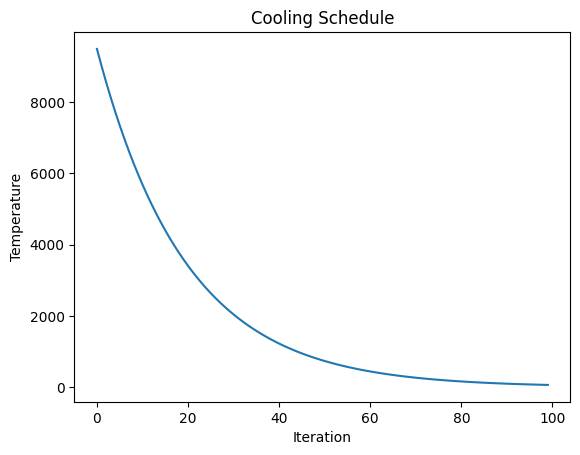

In [120]:
import matplotlib.pyplot as plt

temperature = 10000
k = 0.95
t_list = []
for i in range(100):
    temperature = cooling_schedule(temperature, k)
    t_list.append(temperature)
    
plt.plot(t_list);
plt.title("Cooling Schedule");
plt.xlabel("Iteration");
plt.ylabel("Temperature");

In [121]:
#Select a repetition schedule
#number of iterations executed at each temperature
def repetition_schedule(T):
    #TODO
    return 2

In [122]:

def encode_phrase_to_bin(phrase, bin_str_size = 7):

    str_list = [i for i in phrase]

    final_string = ''
    for idx in range(len(str_list)):
        letter = str_list[idx]
        integer_representation = all_letters.index(letter)
        binary_string = bin(int(inverse_scale(integer_representation)))[2:].zfill(bin_str_size) 
        final_string += binary_string
    return final_string

In [123]:
encode_phrase_to_bin('hello')

'00101110010011001110000111000100000'

In [124]:
decode_binary_to_phrase('00101110010011001110000111000100000')

'hello'

In [125]:
np.random.rand()

0.152507263613904

In [126]:
#Select a initial Solution
s0 = generate_random_solution(len(phrase))
observation = 0

min_temperature = 0.000001
max_temperature = 100
score_list = []
bin_list = []
#max_score_list, min_score_list = [], []
#Select the temperature change counter
k = 0.998
bin_phrase = encode_phrase_to_bin(phrase)
#Select an initial temperature
T = max_temperature

while T > min_temperature:
    iterations_over_T = repetition_schedule(T)

    for i in range(iterations_over_T):
        
        #Generate a new solution
        s1 = perturbate_solution(s0, 1)
        
        s1_score = individual_score(bin_phrase, s1)
        s0_score = individual_score(bin_phrase, s0)
        
        delta = s1_score - s0_score
        
        if delta <= 0:
            s0 = s1
            
        else: #delta > 0
            p = np.exp(-delta/T)
            if np.random.random() > p:
                s0 = s1
                
        observation += 1
        score_list.append(s0_score)
        
    T = cooling_schedule(T, k)
    
    #Helper Functions
    
    if observation % 10 == 0:
        bin_list.append(s0)
        
    if observation % 1000 == 0:
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        print(decode_binary_to_phrase(s0))
        print(s0)
        
    
    
    if s0_score == 0:
        
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        print(decode_binary_to_phrase(s0))
        print(s0)
        
        break

Observation: 1000 | Temperature 36.75112548571584 | score: 0.0049261083743842304 | p: 0.9998662373660766
Heuristicas e Metaheur6sticas
01110100010011010100101001000011000010011001001110011000001000000011100100110111111100100111111111100000100100110100111000111000101110010011010100101001000001000010011001001110011000001000000011100100110
Observation: 1086 | Temperature 33.71971684352324 | score: 0.0 | p: 0.9998542129577032
Heuristicas e Metaheuristicas
01110100010011010100101001000011000010011001001110011000001000000011100100110111111100100111111111100000100100110100111000111000101110010011010100101001000011000010011001001110011000001000000011100100110


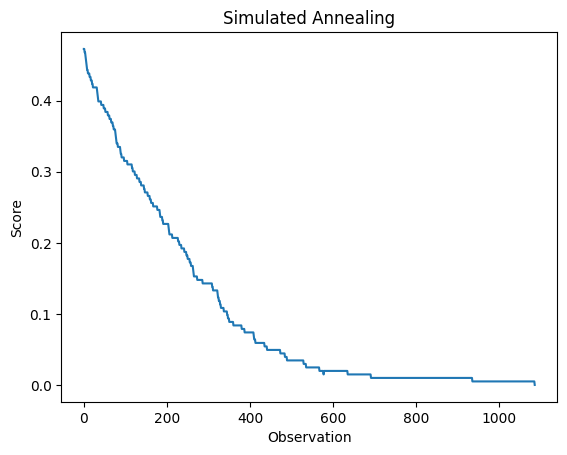

In [127]:
plt.plot(score_list);
plt.title("Simulated Annealing");
plt.xlabel("Observation");
plt.ylabel("Score");

C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18128\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

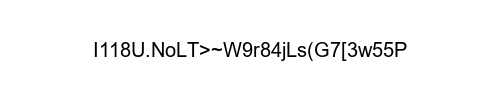

In [128]:
text_list = [decode_binary_to_phrase(bin_string) for bin_string in bin_list]
generate_GIF(text_list);